Optimal Theta: [ 0.32395465  2.38613663 -2.49462467]
Final Cost Function Value: 0.22910578679491778


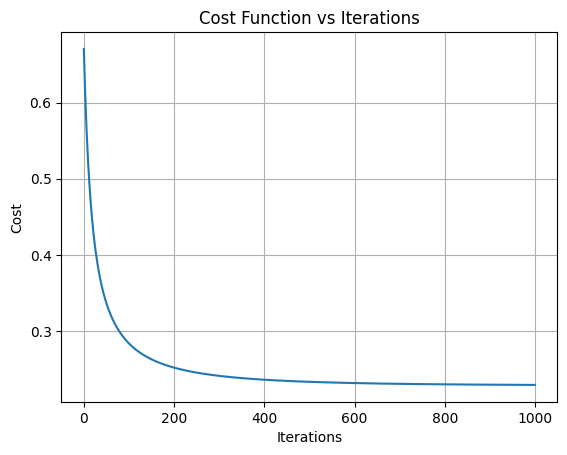

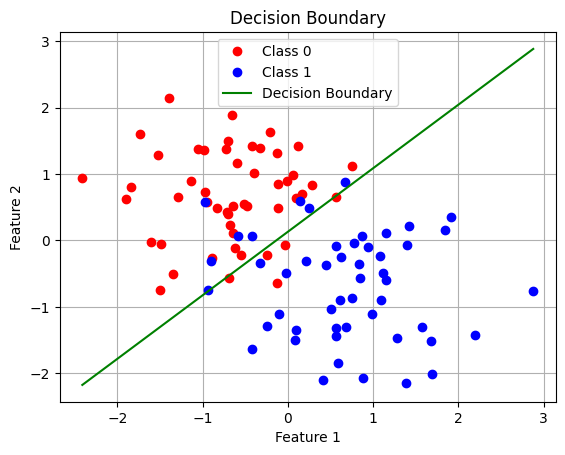

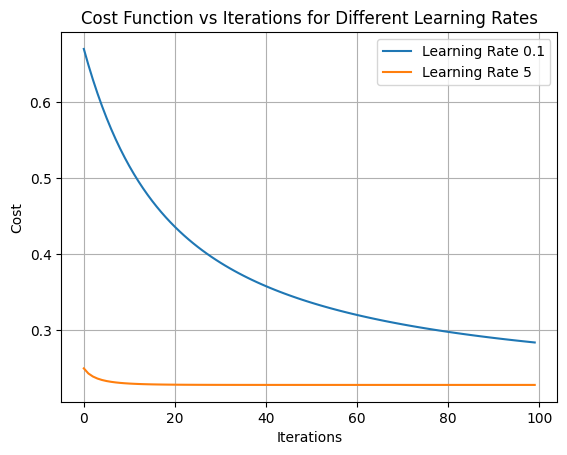

Confusion Matrix: TP=42, TN=45, FP=5, FN=8
Accuracy: 0.87
Precision: 0.89
Recall: 0.84
F1-Score: 0.87


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


X = pd.read_csv('/content/logisticX.csv', header=None).values
y = pd.read_csv('/content/logisticY.csv', header=None).values


X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)


X = np.hstack((np.ones((X.shape[0], 1)), X))


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    return (-1 / m) * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h)))


def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = (1 / m) * np.dot(X.T, (h - y))
        theta -= learning_rate * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost[0][0])

    return theta, cost_history


theta = np.zeros((X.shape[1], 1))
learning_rate = 0.1
num_iterations = 1000


theta_optimal, cost_history = gradient_descent(X, y, theta, learning_rate, num_iterations)


print("Optimal Theta:", theta_optimal.flatten())
print("Final Cost Function Value:", cost_history[-1])


plt.plot(range(len(cost_history)), cost_history)
plt.title("Cost Function vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid()
plt.show()


x_values = [np.min(X[:, 1]), np.max(X[:, 1])]
y_values = -(theta_optimal[0] + theta_optimal[1] * np.array(x_values)) / theta_optimal[2]

plt.plot(X[y.flatten() == 0][:, 1], X[y.flatten() == 0][:, 2], 'ro', label='Class 0')
plt.plot(X[y.flatten() == 1][:, 1], X[y.flatten() == 1][:, 2], 'bo', label='Class 1')
plt.plot(x_values, y_values, 'g-', label='Decision Boundary')
plt.title("Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()


theta_lr1 = np.zeros((X.shape[1], 1))
theta_lr2 = np.zeros((X.shape[1], 1))
learning_rate1 = 0.1
learning_rate2 = 5
num_iterations = 100

_, cost_history_lr1 = gradient_descent(X, y, theta_lr1, learning_rate1, num_iterations)
_, cost_history_lr2 = gradient_descent(X, y, theta_lr2, learning_rate2, num_iterations)

plt.plot(range(num_iterations), cost_history_lr1, label=f"Learning Rate {learning_rate1}")
plt.plot(range(num_iterations), cost_history_lr2, label=f"Learning Rate {learning_rate2}")
plt.title("Cost Function vs Iterations for Different Learning Rates")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.grid()
plt.show()


def confusion_matrix(X, y, theta):
    predictions = (sigmoid(np.dot(X, theta)) >= 0.5).astype(int)
    tp = np.sum((predictions == 1) & (y == 1))
    tn = np.sum((predictions == 0) & (y == 0))
    fp = np.sum((predictions == 1) & (y == 0))
    fn = np.sum((predictions == 0) & (y == 1))
    return tp, tn, fp, fn

tp, tn, fp, fn = confusion_matrix(X, y, theta_optimal)
accuracy = (tp + tn) / len(y)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")
